In [41]:
import papermill as pm
import mlflow
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [42]:
# Default Parameters
run_id = None
train_data_path = "/home/vincent/projects/MLRC_2023/data/ImageNet/ILSVRC/Data/CLS-LOC/train/n07753275/"
test_data_path = "/home/vincent/projects/MLRC_2023/data/ImageNet/ILSVRC/Data/CLS-LOC/train/n07753113/"

train_data_save_path = "/home/vincent/projects/MLRC_2023/data/ImageNet/preprocessed/ImageNet/train/"
test_data_save_path = "/home/vincent/projects/MLRC_2023/data/ImageNet/preprocessed/ImageNet/test/"

train_data = []
test_data = []

In [43]:
# if using pretrained model
from torchvision.models import ResNet50_Weights

resnet50_weights = ResNet50_Weights.DEFAULT

# img_transformed = preprocess(img)
preprocess = resnet50_weights.transforms()

In [25]:
# read train_data
for file in os.listdir(train_data_path):
    image = plt.imread(train_data_path + file)
    # if image only has 2 dimensions, add a 3rd dimension
    if len(image.shape) == 2:
        image = np.stack((image,) * 3, axis=-1)
    preprocessed_image = preprocess(Image.fromarray(image))
    train_data.append(preprocessed_image)
    
for file in os.listdir(test_data_path):
    image = plt.imread(test_data_path + file)
    print
    # if image only has 2 dimensions, add a 3rd dimension
    if len(image.shape) == 2:
        image = np.stack((image,) * 3, axis=-1)
    preprocessed_image = preprocess(Image.fromarray(image))
    test_data.append(preprocessed_image)

In [33]:
from torch.utils.data import Dataset
import torch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


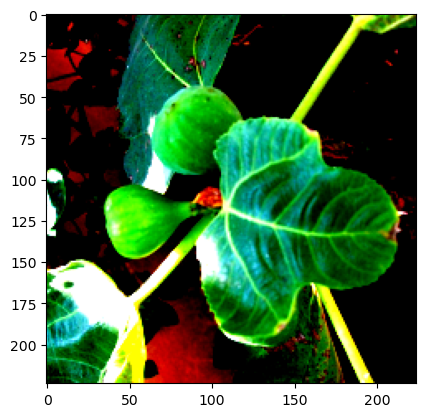

In [39]:
plt.imshow(torch.swapaxes(test_data[0], 0, 2).numpy())

In [14]:
from utils import md5_dir

#train_directory = "data/ImageNet/train"
#test_directory = "data/ImageNet/test/"

train_data_path = "/home/vincent/projects/MLRC_2023/data/ImageNet/ILSVRC/Data/CLS-LOC/train/n07753275/"
test_data_path = "/home/vincent/projects/MLRC_2023/data/ImageNet/ILSVRC/Data/CLS-LOC/train/n07753113/"

#train_set_hash = md5_dir(train_directory)
test_set_hash = md5_dir(test_data_path)

In [16]:
with mlflow.start_run(run_id=run_id):
    mlflow.log_param("random_param", 3)
    environment_path = "environment.txt"
    mlflow.log_artifact("environment", environment_path)
    mlflow.log_param("test_set_hash", test_set_hash)
    mlflow.log_param("train_set_hash", train_set_hash)

FileNotFoundError: [Errno 2] No such file or directory: 'environment'